# <b>Lab 1</b>: Visulization & Data Preprocessing
# <center><font color='red'>Student Exam Scores Extended Dataset</font></center> 
***
### <center><b> Team Members: </b> Joey Hernendez, Daniel Chang, and Vo Nguyen</center>

### <b>Table of Contents</b>
<a class="anchor" id="toc"></a>
* [Business Understanding](#understand)
* [Data Understanding](#data)
    * [Import Library](#import)
    * [Loading the Data](#load)
    * [Data Description](#description)  
* [Data Quality](#quality)
    * [Data Inspection](#inspect)
    * [Addressing Missing Values](#missing)
    * [Addressing Duplicates](#duplicate)
    * [Addressing Outliers](#duplicate)
* [Data Summary](#summary)
* [Visualization](#visual)
    * [Top 5 Feature Visualization (Removed Nan)](#removed)

## <b>Business Understanding [↑](#toc)</b>
<a class="anchor" id="understand"></a>
The dataset (fictional) comprises scores from three tests of students at a public school, as well as personal and socio-economic factors that may have interaction effects. The purpose of collecting this data is to identify potential relationships between personal and socio-economic factors and test scores. By understanding which factors have the most significant impact on test scores, educators, parents, and students can focus their attention on variables that could potentially help students earn higher scores. This information can be used to inform educational policies and practices, as well as to develop targeted interventions to support students who may be struggling academically. Ultimately, the goal of collecting this data is to improve educational outcomes and promote academic success for all students.

Student education and testing scores are critical to their future success. Education provides the foundation upon which students will build their future, and improving the efficiency of learning and testing experiences can have a positive impact on many students' futures. By analyzing the dataset, we can identify factors that influence student performance and develop strategies to improve academic outcomes.

To determine if we have mined useful knowledge from the dataset, we need to identify patterns and significant relationships that help us to better understand student performance factors. This could include identifying the most significant predictors of test scores, understanding the impact of teaching practices on student learning, or exploring the relationship between socio-economic status and academic outcomes. By evaluating the results of our analyses in light of the original research questions and hypotheses, we can determine whether we have gained useful insights that can inform educational policies and practices and promote academic success for all students.

To measure the effectiveness of a good prediction algorithm, we need to evaluate its accuracy in predicting test scores and its interpretability in identifying the factors that influence those scores. Accuracy can be measured using standard metrics such as mean squared error or root mean squared error, which compare the predicted test scores to the actual scores. However, accuracy alone is not sufficient to evaluate the effectiveness of a prediction algorithm. We also need to consider the interpretability of the results, which requires us to examine the relationship between the input variables and the predicted test scores.
***

## <b>Data Understanding [↑](#toc)</b>
<a class="anchor" id="data"></a>

Our team will be performing a exploratory data analysis with an emphasis on the visulization and data processing using the dataset found on [Kaggle].(https://www.kaggle.com/datasets/desalegngeb/students-exam-scores). Our EDA will consistent of statistical summaries of our attributes, visualizing the attributes, and making conclusions based on our visualization and data processing.

Our visualization will take account of data with null values, imputed values, and removed null values to determien the right course of action. 

### <b>Import Library [↑](#toc)</b>
<a class="anchor" id="import"></a>

In [1]:
# Needed Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

import seaborn as sns
from tabulate import tabulate

### <b>Loading the Data [↑](#toc)</b>
<a class="anchor" id="load"></a>

In [2]:
df = pd.read_csv("Expanded_data_with_more_features.csv")
#  select all columns except the first column (index)
df = df[df.columns[1:]]
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


### <b>Data Description [↑](#toc)</b>
<a class="anchor" id="description"></a>

### Description of Data: 

|Feature   |Description   |Data Type   |Value Type (Scale)  |
|:---------|:--------------|:---------------|:------------|
| Gender | Gender of the Student | Object (Categorical) | Male/Female |
| EthnicGroup | Ethnicity of the Student | Object (Categorical) | Group A to E |
| ParentEduc | Parent(s) Educational Background | Object (Categorical) | Some High School to Master's Degree |
| LunchType | School Lunch Type | Object (Categorical) | Standard or Free/Reduced |
| TestPrep | Test Preparation Course Completed | Object (Categorical) | Completed or None |
| ParentMaritalStatus | Parent(s) Martial Status | Object (Categorical) | Married/Single/Windowed/Divorced |
| PracticeSport | How Often Student Practice Sport(s) | Object (Categorical) |Never/Sometimes/Regularly |
| IsFirstChild | First Child of the Family | Object (Categorical) | Yes/No |
| NrSiblings | # of Siblings | Int64(Continuous) | 0 - 7 |
| TransportMeans | Transportation | Object (Categorical) | School Bus or Private |
| WklyStudyHours | # of Hours Study Weekly | Object (Categorical) | Less than 5 hours; Between 5 and 10 hours; More than 10 hours |
| MathScore | Math Test Score| Int64(Continuous) | 0 - 100 |
| ReadingScore | Reading Test Score | Int64(Continuous) | 0 - 100  |
| WritingScore | Writing Test Score | Int64(Continuous) | 0 - 100  |

*For any binary data type, "0" means "No" and "1" means "Yes".

### <b>Data Inspection [↑](#toc)</b>
<a class="anchor" id="inspect"></a>

The original (extended) dataset has 30,641 rows and 14 attributes. We removed the "id" attributes as it is an index.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.3+ MB


In [4]:
df.nunique()

Gender                  2
EthnicGroup             5
ParentEduc              6
LunchType               2
TestPrep                2
ParentMaritalStatus     4
PracticeSport           3
IsFirstChild            2
NrSiblings              8
TransportMeans          2
WklyStudyHours          3
MathScore              95
ReadingScore           90
WritingScore           93
dtype: int64

### Addressing Missing Values [↑](#toc)
<a class="anchor" id="missing"></a>
  
  - The dataset contains many missing values at first glance. Upon further investigation, we found that many columns of data contain "nan".<br><br>    
   - The nan values are only in categorical variables and could likely be attributed to not having an answer that fits within the given reponses. It's hard to determine this since we have no information on how each response was gathered, and from who/how it was gathered.<br><br>      
   - The missing data will of course be handled on a case by case basis, but we will evaluate the missing values to uncover potential reasons that will lead us in understanding how to handle the NANs.
   - In total NAN make up 37.2% of the data in our dataframe.

### - Missing Values - Potential Reasonings:

Ultimatley there can be numerous reasons for why there are so many missing values especially when we have limited knowledge on the data gathering and study creation process. 
Left to our assumptions some possible reasons for the missing values could be the following:

   - **Ethnic Group**: This could be result of not fitting into Group A-E, or a choice to not provide the information. or truly missing data.<br><br>     
   - **Parent Edu**: This could be a result of not fitting into the specific groups (having a PhD for example), or a choice not to provide the information. or truly missing data.<br><br>      
   - **TestPrep**: This is likely to be a result of not fitting into the specific groups (maybe being "in progress", or "started"/"some"). The reasoning is that this is (likley) not a controversial or discriminatory question in nature and would leave us with a reasonable assumption. <br><br>         
   - **ParentMartitalStatus**: This is likely to be a result of choosing to not offer a response, or truly missing data. (additionally there is the potential for this to be due to not having the answer choice "never married" meaning the parents are together but never married.)<br><br>      
   - **Practice Sport**: This could be a result of not fitting into a specific group (there is no answer for "not in sports", or addressing other extra cirrcular activities, etc).<br><br>        
   - **Is First Child**: likley to be missing data. Alternatively many instances of twins who don't know who was first or have a "step" sibling of same age.<br><br>  
   - **Transport Means**: can be missing data or likely to be result of not fitting into the specific group (no walking/biking option)<br><br> 
   - **Wkly Study Hours**: likely to be missing data since the scale of options is covered, or maybe even "other" if they participate in an activity that is study related but isn't "independent" studying.  <br><br> 
     
Because we are unsure of the true reasoning it is best to investigate the data itself to see if we can uncover some of the missing data characteristics that will help aid our decision for handling the missing data. 

### Missing Value Heatmap

- So that we could better understand any underlying patterns or associations in the NAN values found in our data we created a NAN heatmap. The heatmap will:
    - Provide a visual representation of missing data patterns across variables in a dataset.
    - Quickly assess the extent of missing data for each variable.
    - Reveal relationships between missing values across different variables.
    - Determine missingness mechanisms such as MCAR, MAR, MNAR. 

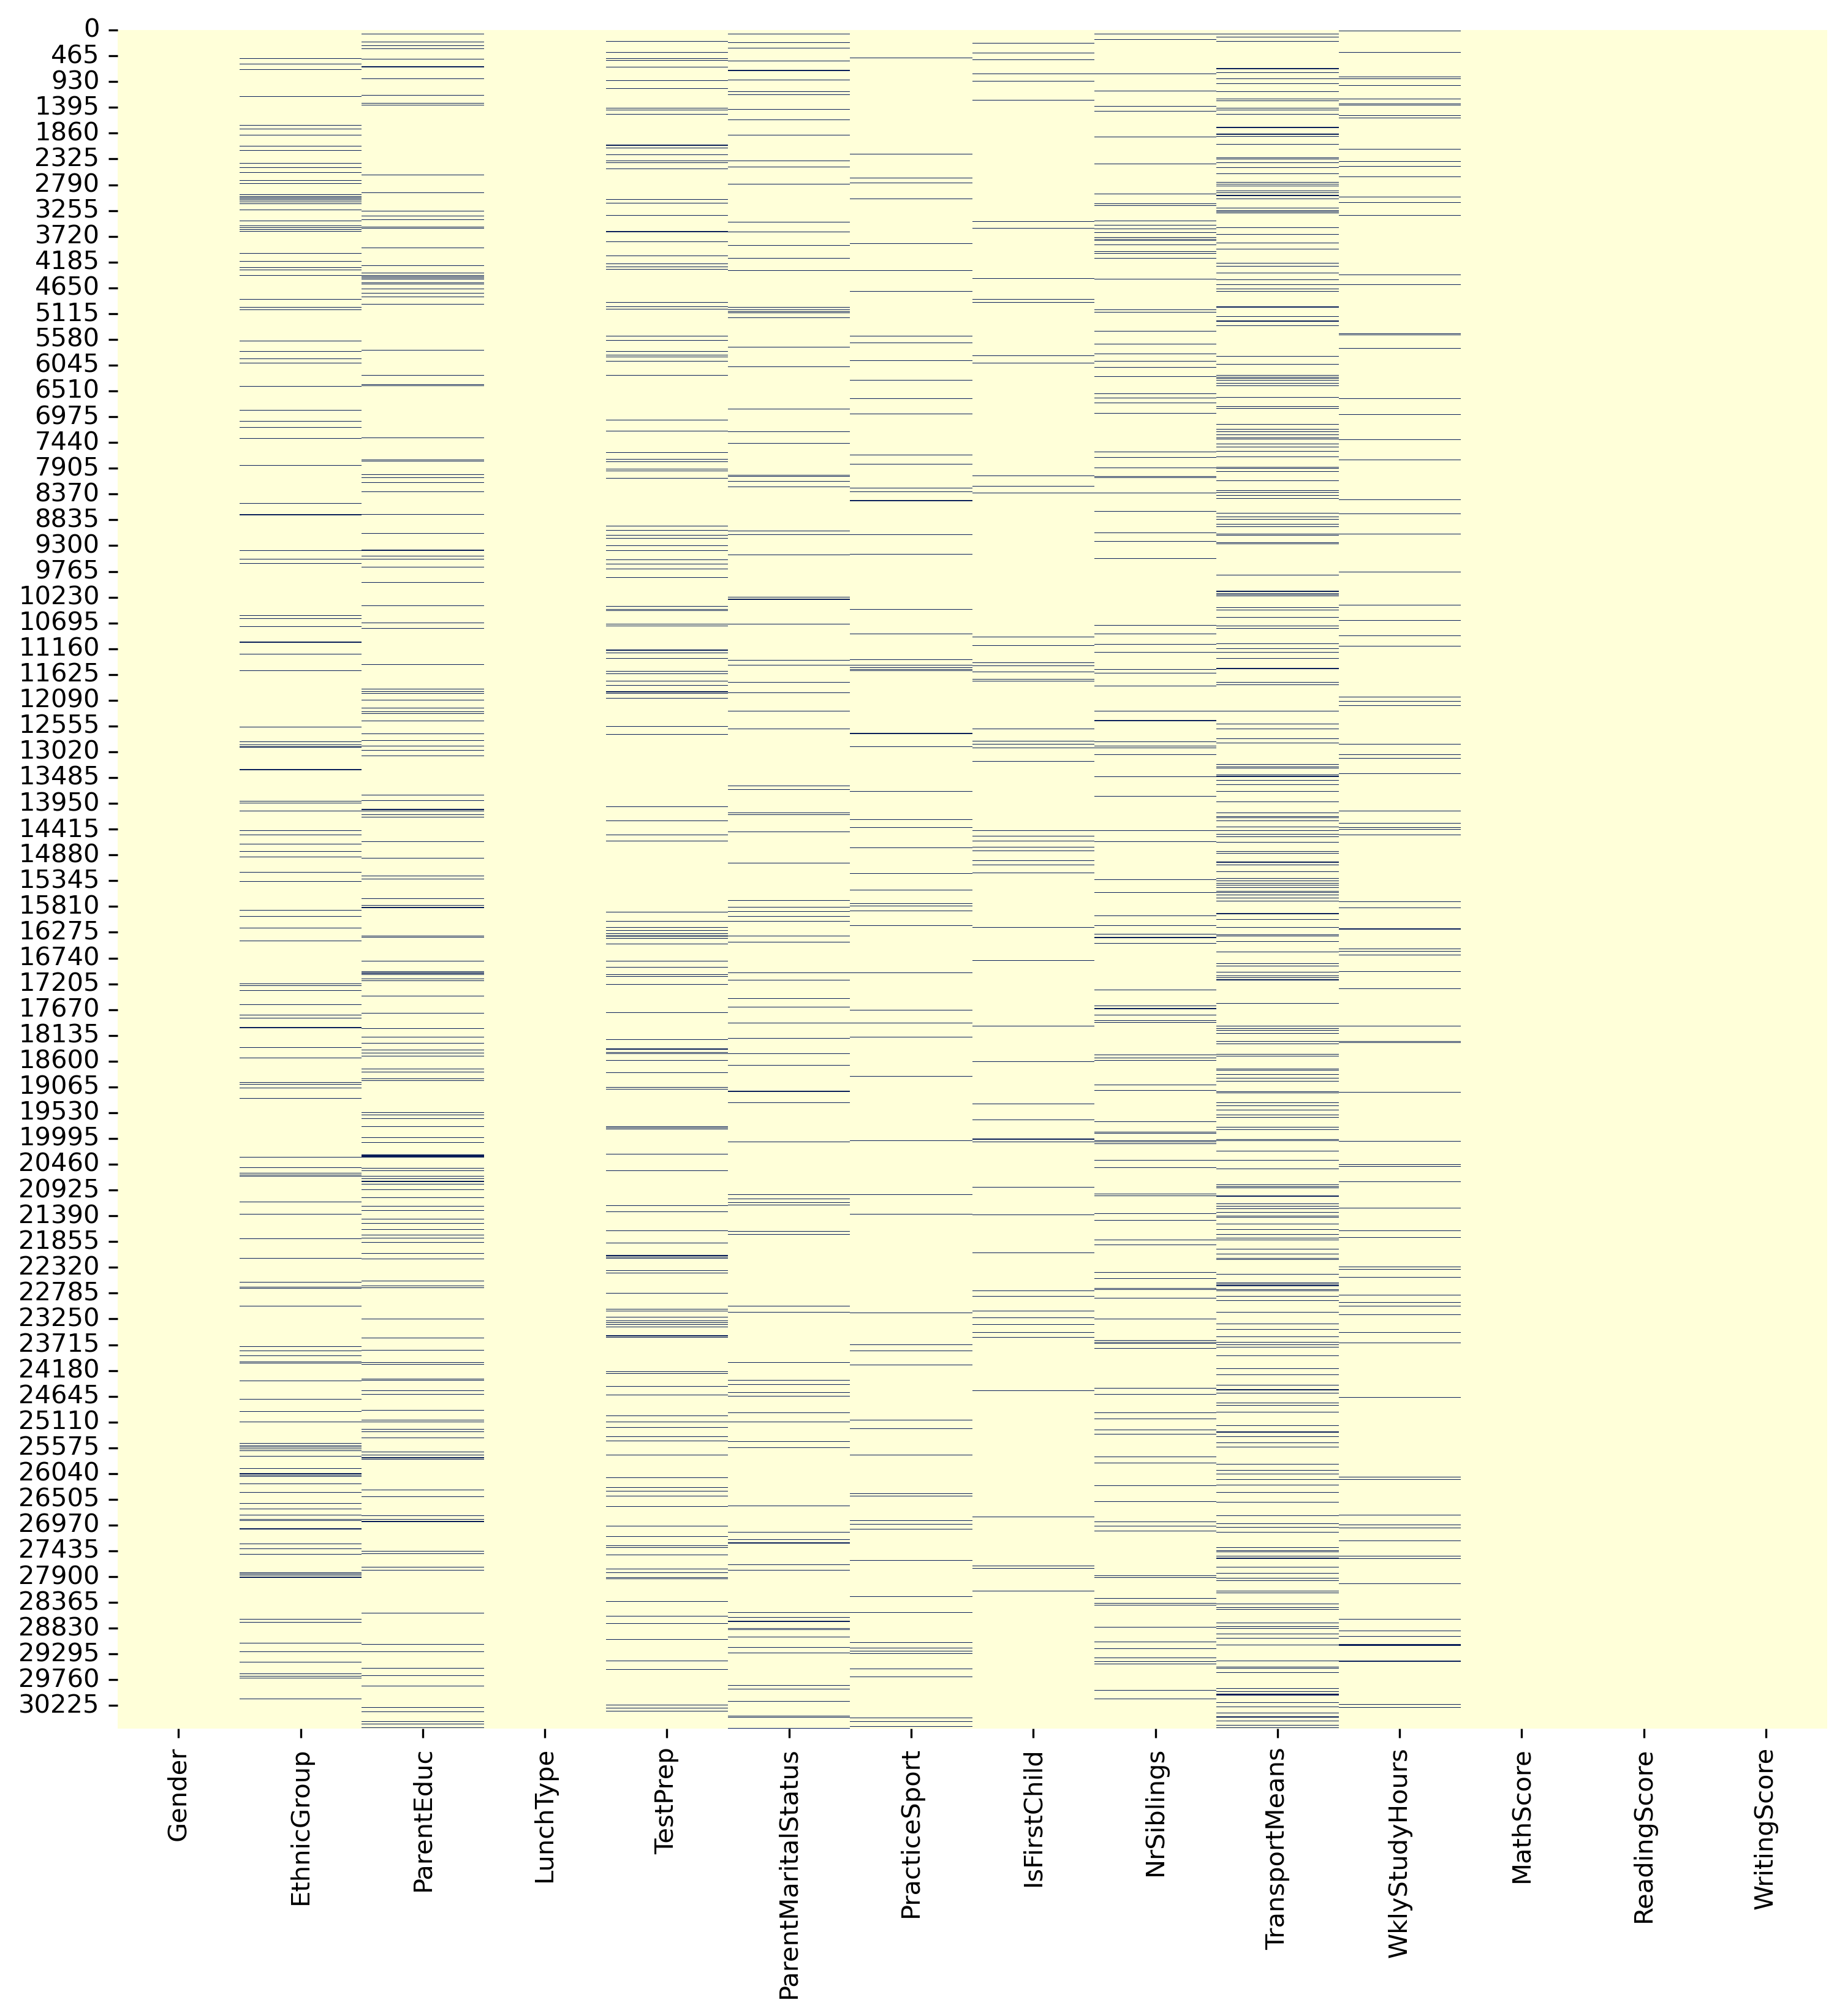

In [5]:
#missing data heatmap
plt.figure(figsize=(12,12), dpi = 300)
sns.heatmap(df.isnull(), cmap = "YlGnBu", cbar = False)
plt.show()

In [6]:
# Checking Missing Data
df.isnull().sum()

Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [7]:
# Percentage of missing data
100 * df.isnull().sum() / len(df)

Gender                  0.000000
EthnicGroup             6.005026
ParentEduc              6.021344
LunchType               0.000000
TestPrep                5.972390
ParentMaritalStatus     3.883685
PracticeSport           2.059332
IsFirstChild            2.950295
NrSiblings              5.130381
TransportMeans         10.228126
WklyStudyHours          3.116739
MathScore               0.000000
ReadingScore            0.000000
WritingScore            0.000000
dtype: float64

In [8]:
def percent_missing(df):
    percent_nan = 100* df.isnull().sum()/len(df)
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

percent_nan = percent_missing(df)

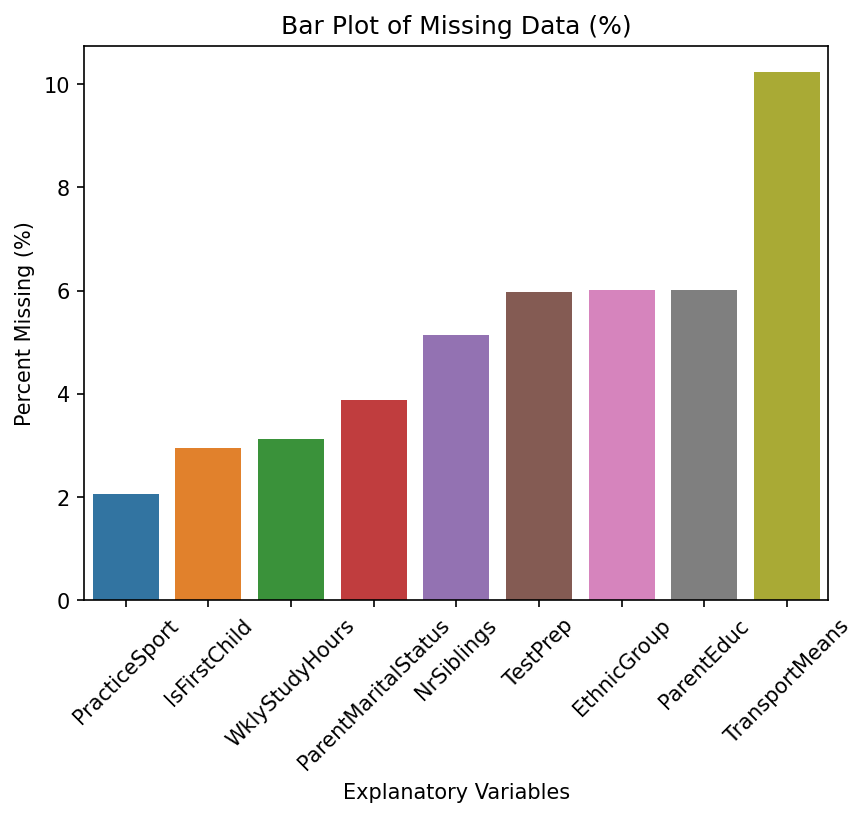

In [9]:
# plot of missing data (percentage) 
plt.figure(dpi = 150)
sns.barplot(x=percent_nan.index, y = percent_nan)
plt.title("Bar Plot of Missing Data (%)")
plt.xlabel("Explanatory Variables")
plt.ylabel("Percent Missing (%)")
plt.xticks(rotation = 45);

### - Handling Missing Values 
   
   After investigation of our data and under the assumption that our data are missing completley at random, there are a number of ways for us to proceed:
   1) Discard observations with any missing values
   2) Relying on a learning algorithm to deal with missing values in the training phase
   3) Impute all missing values before training. 

**The 2 options discussed for our group:**


Option 1 would effectively remove 37.2% of our the observations in our data frame. This is quite a substantial loss of information and was ultimately decided against. 

Option 3 (imputation). This option seems to make sense given that the data appear to be MCAR, it will allow us to keep the 37% of our data effectively preserving our sample size, and it will help us to maintain more statistical power and precision. It should however be noted that while data imputation is very useful in handling missing values some tradeoffs and consideration are to be had such as: 
 - Potential Bias
 - Assumption reliance
 - Loss of Variability
 - Uncertanity estimation


### Missing Value Decision Application

In [10]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

### Addressing Duplicates [↑](#toc)
<a class="anchor" id="duplicate"></a>

There are no duplicated rows or columns in the data. While there may be certain values (such as scores) which are "duplicated" this is to be expected.

In [11]:
# viewing duplicated data rows/cols
duplicate_sum = df.duplicated().sum()
print("Total Duplicated Rows", duplicate_sum)

duplicate_sum_column = df.duplicated(). sum(axis =0)
print("Total Duplicated Columns", duplicate_sum_column)

Total Duplicated Rows 1
Total Duplicated Columns 1


### Addressing Outliers [↑](#toc)
<a class="anchor" id="outlier"></a>

While there are a number of outliers and one notable one is 0 in Math Score, we have decided that it wouldn't make any sense to remove any of them because we believe that every single value in each of these score columns are rather important. We will not remove any datapoints. 

In [12]:
def find_IQR(df,x):
    # IQR
    Q1 = np.percentile(df[x], 25)
    Q3 = np.percentile(df[x], 75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

In [13]:
# Math IQR
Q1, Q3, IQR = find_IQR(df, "MathScore")

# Upper Bound
math_upper=Q3+1.5*IQR
mathupper_array=df[np.array(df["MathScore"]>=math_upper)]

mathupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [14]:
# Lower bound
math_lower=Q1-1.5*IQR
mathlower_array=df[np.array(df["MathScore"]<=math_lower)]

mathlower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
17,female,group B,some high school,free/reduced,none,divorced,sometimes,yes,1.0,school_bus,5 - 10,18,32,28
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
136,female,group C,some college,free/reduced,none,single,regularly,yes,1.0,school_bus,< 5,21,38,33
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
751,female,group B,some college,standard,none,single,regularly,no,4.0,private,< 5,18,37,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28544,female,group C,some college,free/reduced,none,single,sometimes,yes,3.0,private,5 - 10,11,39,34
28597,female,group D,high school,free/reduced,completed,married,sometimes,yes,2.0,school_bus,> 10,9,32,32
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
29654,female,group B,associate's degree,free/reduced,none,single,sometimes,no,4.0,private,5 - 10,19,41,34


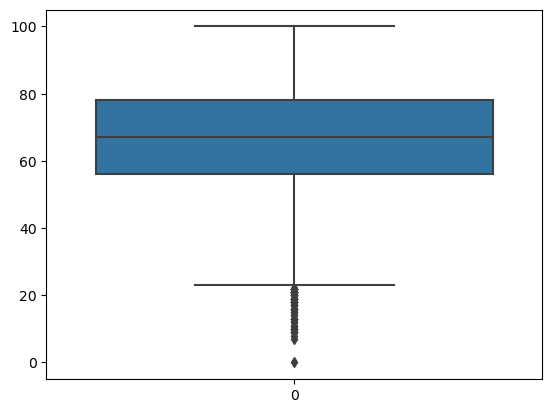

In [15]:
sns.boxplot(df["MathScore"])
plt.show()

In [16]:
# Reading IQR
Q1, Q3, IQR = find_IQR(df, "ReadingScore")

# Upper Bound
reading_upper=Q3+1.5*IQR
readingupper_array=df[np.array(df["ReadingScore"]>=reading_upper)]

readingupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [17]:
# Lower bound
reading_lower=Q1-1.5*IQR
readinglower_array=df[np.array(df["ReadingScore"]<=reading_lower)]

readinglower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,married,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
928,female,group B,high school,free/reduced,none,married,sometimes,yes,1.0,private,5 - 10,8,24,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28698,male,group C,associate's degree,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,27,26,23
29000,male,group A,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,< 5,21,18,21
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30412,male,group C,some high school,free/reduced,none,single,regularly,no,1.0,private,5 - 10,33,25,29


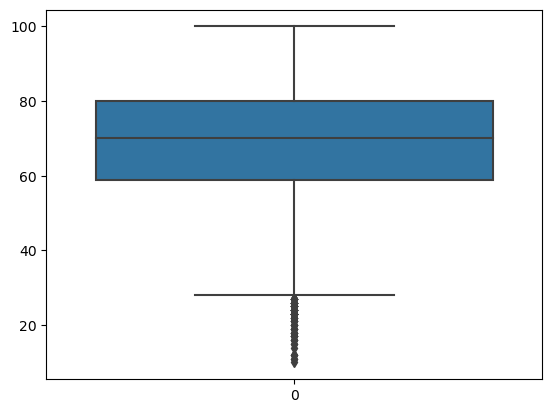

In [18]:
sns.boxplot(df["ReadingScore"])
plt.show()

In [19]:
# Writing IQR
Q1, Q3, IQR = find_IQR(df, "WritingScore")

# Upper Bound
write_upper=Q3+1.5*IQR
writeupper_array=df[np.array(df["WritingScore"]>=write_upper)]

writeupper_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore


In [20]:
# Lower bound
write_lower=Q1-1.5*IQR
writelower_array=df[np.array(df["WritingScore"]<=write_lower)]

writelower_array

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
55,female,group C,some high school,free/reduced,none,single,regularly,yes,3.0,school_bus,> 10,0,17,10
69,male,group E,some high school,standard,none,married,sometimes,no,5.0,school_bus,5 - 10,28,25,21
308,male,group A,some college,free/reduced,none,married,regularly,yes,2.0,school_bus,> 10,29,23,19
319,female,group B,some high school,free/reduced,none,single,sometimes,no,3.0,school_bus,< 5,23,37,26
565,male,group B,high school,free/reduced,none,married,regularly,no,2.0,school_bus,5 - 10,30,24,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29274,female,group E,some college,free/reduced,none,married,sometimes,no,1.0,school_bus,5 - 10,30,32,26
29817,male,group D,high school,free/reduced,none,married,sometimes,no,1.0,private,5 - 10,33,31,22
30389,male,group B,associate's degree,free/reduced,none,divorced,never,no,1.0,school_bus,5 - 10,24,14,4
30478,male,group D,associate's degree,standard,none,married,sometimes,no,1.0,school_bus,< 5,32,19,20


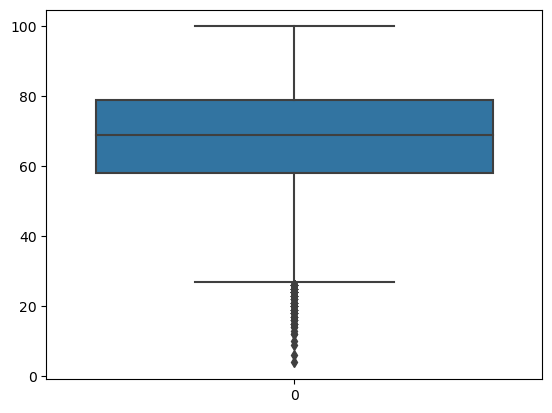

In [21]:
sns.boxplot(df["WritingScore"])
plt.show()

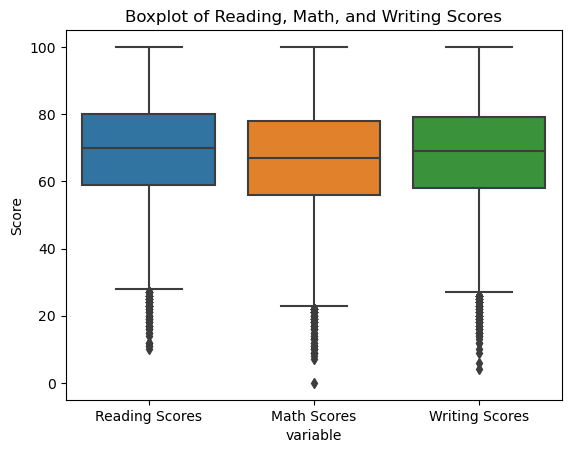

In [22]:
# Create a DataFrame of the scores
scores_df = df[["ReadingScore", "MathScore", "WritingScore"]]

# Melt the DataFrame to "long-form" format
scores_melt = pd.melt(scores_df)

# Create the boxplot using Seaborn
sns.boxplot(x="variable", y="value", data=scores_melt)

# Add labels to the x-axis ticks
plt.xticks([0, 1, 2], ["Reading Scores", "Math Scores", "Writing Scores"])

# Add labels to the y-axis
plt.ylabel("Score")

# Add a title
plt.title("Boxplot of Reading, Math, and Writing Scores")

# Display the plot
plt.show()


## <b> Data Summary [↑](#toc) </b>
<a class="anchor" id="summary"></a>
By analyzing these statistics for Reading Score, Math Score, and Writing Score, educators, researchers, and policymakers can gain insights into the performance of students in these subjects and identify areas of improvement. For example, if the mean score for Reading Score is significantly lower than the mean score for Math Score and Writing Score, educators may need to focus more on improving the reading skills of students. Similarly, if the standard deviation of Math Score is significantly higher than the standard deviation of Reading Score and Writing Score, policymakers may need to investigate the reasons behind the variability of the performance of students in Math Score and implement interventions to address the issue.

### Metrics Defined

   - **Range**: The range is the difference between the highest and the lowest values in a dataset. It gives an indication of how spread out the data is. <br><br>
   - **Mode**: The mode is the value that appears most frequently in a dataset. It represents the most common or typical value in the data. <br><br> 
   - **Mean**: The mean is the average of all values in a dataset. It is calculated by summing up all the values and dividing by the number of values. <br><br>
   - **Median**: The median is the middle value of a dataset when it is ordered from lowest to highest (or highest to lowest). It is used as a measure of central tendency when the dataset contains outliers or is not normally distributed. <br><br>
   - **Standard Deviation**: The standard deviation is a measure of the spread or dispersion of a dataset. It represents how much the values in a dataset vary from the mean. A higher standard deviation indicates a larger spread of the data. <br><br> 
   - **Min**: The minimum value is the smallest value in a dataset.<br><br> 
   - **25%**: The 25th percentile, also known as the first quartile, is the value below which 25% of the data falls. <br><br> 
   - **50%**: The 50th percentile, also known as the median, is the middle value of the dataset. <br><br> 
   - **75%**: The 75th percentile, also known as the third quartile, is the value below which 75% of the data falls. <br><br> 
   - **Max**: The maximum value is the largest value in a dataset.<br><br> 
   - **Count**: The count is the total number of values in a dataset.<br><br> 

In [23]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NrSiblings,30641.0,2.087106,1.442665,0.0,1.0,2.0,3.0,7.0
MathScore,30641.0,66.558402,15.361616,0.0,56.0,67.0,78.0,100.0
ReadingScore,30641.0,69.377533,14.758952,10.0,59.0,70.0,80.0,100.0
WritingScore,30641.0,68.418622,15.443525,4.0,58.0,69.0,79.0,100.0


In [24]:
# Calculate the statistics using describe()
reading_stats = df["ReadingScore"].describe()
math_stats = df["MathScore"].describe()
writing_stats = df["WritingScore"].describe()

# Calculate the mode separately
reading_mode = df["ReadingScore"].mode()
math_mode = df["MathScore"].mode()
writing_mode = df["WritingScore"].mode()

# Add the mode to the statistics DataFrame
reading_stats["Mode"] = reading_mode[0]
math_stats["Mode"] = math_mode[0]
writing_stats["Mode"] = writing_mode[0]

# Combine the statistics into a single DataFrame
stats_df = pd.DataFrame({"Reading Score": reading_stats,
                         "Math Score": math_stats,
                         "Writing Score": writing_stats})

# Convert the DataFrame to a visual table
table = tabulate(stats_df, headers='keys', tablefmt='fancy_grid')

# Print the table
print(table)

╒═══════╤═════════════════╤══════════════╤═════════════════╕
│       │   Reading Score │   Math Score │   Writing Score │
╞═══════╪═════════════════╪══════════════╪═════════════════╡
│ count │      30641      │   30641      │      30641      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ mean  │         69.3775 │      66.5584 │         68.4186 │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ std   │         14.759  │      15.3616 │         15.4435 │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ min   │         10      │       0      │          4      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ 25%   │         59      │      56      │         58      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ 50%   │         70      │      67      │         69      │
├───────┼─────────────────┼──────────────┼─────────────────┤
│ 75%   │         80      │      78      │         79      │
├───────┼───────────────

  ### Significance of the Values Calculated:
  
  **Range:** The range of Reading Score, Math Score, and Writing Score can provide an idea of how spread out the scores are and the variability of the performance of students in these subjects.<br><br> 
   **Mode:** The mode of Reading Score, Math Score, and Writing Score can provide an idea of the most common score achieved by students in these subjects, which can be useful for identifying areas of strength and weakness.<br><br> 
   **Mean:** The mean of Reading Score, Math Score, and Writing Score can provide an idea of the average performance of students in these subjects, which can be useful for comparing the performance of different groups of students.<br><br> 
   **Median:** The median of Reading Score, Math Score, and Writing Score can provide an idea of the central tendency of the scores, which can be useful for identifying outliers and extreme values that may skew the mean.<br><br> 
   **Standard Deviation:** The standard deviation of Reading Score, Math Score, and Writing Score can provide an idea of the spread of the scores around the mean, which can be useful for identifying the variability of the performance of students in these subjects.<br><br> 
   **Min:** The minimum score of Reading Score, Math Score, and Writing Score can provide an idea of the lowest score achieved by students in these subjects.<br><br> 
   **25%, 50%, and 75%**: The quartiles of Reading Score, Math Score, and Writing Score can provide an idea of the spread and distribution of the scores, which can be useful for identifying the performance of students in different percentile ranges.<br><br> 
   **Max:** The maximum score of Reading Score, Math Score, and Writing Score can provide an idea of the highest score achieved by students in these subjects.<br><br> 
   **Count**: The count of Reading Score, Math Score, and Writing Score can provide an idea of the sample size of students who took the test in each subject, which can be useful for making inferences about the population of students.<br><br>     


## <b> Data Investigation for the Top 5 Feature Visualization [↑](#toc) </b>
<a class="anchor" id="removed"></a>

In [25]:
#Number of Missing Values in Each Column
df.isnull().sum()

#Removed the NaN
imputed_df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

imputed_df.describe()
imputed_df.head()

df3 = imputed_df


NameError: name 'df_dropna' is not defined

In [ ]:
#Full Bar Plot Comparisons
sns.pairplot(df3[["WritingScore", "ReadingScore","MathScore", "Gender"]], hue= "Gender")
plt.show()

### Count Plots

Countplot display the number of observation in each category, which mainly focus on comparing between groups.

In [ ]:
#Category Orders
category_ordereg = ["group A", "group B", "group C", "group D"]
category_ordereduc = ["some high school", "high school", "associate's degree", "some college", "bachelor's degree", "master's degree"]


fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(16, 16))
sns.countplot(y="Gender",data=df3,ax=axes[0,0])
sns.countplot(y="EthnicGroup",data=df3,ax=axes[0,1],order = category_ordereg)  
sns.countplot(y="WklyStudyHours",data=df3,ax=axes[1,0])  
sns.countplot(y="LunchType",data=df3,ax=axes[1,1])  
sns.countplot(y="TestPrep",data=df3,ax=axes[2,0])  
sns.countplot(y="ParentMaritalStatus",data=df3,ax=axes[2,1])
sns.countplot(y="PracticeSport",data=df3,ax=axes[3,0])  
sns.countplot(y="IsFirstChild", data=df3,ax=axes[3,1])  
sns.countplot(y="NrSiblings", data=df3,ax=axes[4,0])  
sns.countplot(y="TransportMeans", data=df3,ax=axes[4,1])  
sns.countplot(y="ParentEduc",data=df3,ax=axes[5,0],order=category_ordereduc)  


# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Side-by-Side Comparison column subplots based on Gender and Ethnicity
g = sns.catplot(y="Gender",data=df3,kind="count",col="EthnicGroup")
g.fig.suptitle("Side-by-Side Countplot Comparisons of Gender and Ethnicity")
plt.tight_layout()

## Barplots

<b>Comparing Means: </b>Display the mean of the quantitative variable per category

<b>Confidence Intervals:</b> In each of the barplot for the categorical variables, there is a line that will indicate a 95% interval for the mean. This will allow us to show uncertainty about our estimate, assuming our data is a random sample.

In [ ]:
#Math Score

#Category Orders
category_ordereg = ["group A", "group B", "group C", "group D"]
category_ordereduc = ["some high school", "high school", "associate's degree", "some college", "bachelor's degree", "master's degree"]


fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(16, 16))
sns.barplot(x="Gender", y="MathScore",data=df3,ax=axes[0,0])
sns.barplot(x="EthnicGroup",  y="MathScore",data=df3,ax=axes[0,1],order = category_ordereg)  
sns.barplot(x="WklyStudyHours", y="MathScore",data=df3,ax=axes[1,0])  
sns.barplot(x="LunchType", y="MathScore",data=df3,ax=axes[1,1])  
sns.barplot(x="TestPrep", y="MathScore",data=df3,ax=axes[2,0])  
sns.barplot(x="ParentMaritalStatus", y="MathScore",data=df3,ax=axes[2,1])
sns.barplot(x="PracticeSport", y="MathScore",data=df3,ax=axes[3,0])  
sns.barplot(x="IsFirstChild", y="MathScore",data=df3,ax=axes[3,1])  
sns.barplot(x="NrSiblings", y="MathScore",data=df3,ax=axes[4,0])  
sns.barplot(x="TransportMeans", y="MathScore",data=df3,ax=axes[4,1])  
sns.barplot(x="ParentEduc", y="MathScore",data=df3,ax=axes[5,0],order=category_ordereduc)  

#Vertical Axis
axes[5,0].set_xticklabels(axes[5,0].get_xticklabels(), rotation = 90)

# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Reading Score

#Category Orders
category_ordereg = ["group A", "group B", "group C", "group D"]
category_ordereduc = ["some high school", "high school", "associate's degree", "some college", "bachelor's degree", "master's degree"]


fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(16, 16))
sns.barplot(x="Gender", y="ReadingScore",data=df3,ax=axes[0,0])
sns.barplot(x="EthnicGroup",  y="ReadingScore",data=df3,ax=axes[0,1],order = category_ordereg)  
sns.barplot(x="WklyStudyHours", y="ReadingScore",data=df3,ax=axes[1,0])  
sns.barplot(x="LunchType", y="ReadingScore",data=df3,ax=axes[1,1])  
sns.barplot(x="TestPrep", y="ReadingScore",data=df3,ax=axes[2,0])  
sns.barplot(x="ParentMaritalStatus", y="ReadingScore",data=df3,ax=axes[2,1])
sns.barplot(x="PracticeSport", y="ReadingScore",data=df3,ax=axes[3,0])  
sns.barplot(x="IsFirstChild", y="ReadingScore",data=df3,ax=axes[3,1])  
sns.barplot(x="NrSiblings", y="ReadingScore",data=df3,ax=axes[4,0])  
sns.barplot(x="TransportMeans", y="ReadingScore",data=df3,ax=axes[4,1])  
sns.barplot(x="ParentEduc", y="ReadingScore",data=df3,ax=axes[5,0],order=category_ordereduc)  

#Vertical Axis
axes[5,0].set_xticklabels(axes[5,0].get_xticklabels(), rotation = 90)

# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Writing Score

#Category Orders
category_ordereg = ["group A", "group B", "group C", "group D"]
category_ordereduc = ["some high school", "high school", "associate's degree", "some college", "bachelor's degree", "master's degree"]


fig, axes = plt.subplots(nrows=6, ncols=2,figsize=(16, 16))
sns.barplot(x="Gender", y="WritingScore",data=df3,ax=axes[0,0])
sns.barplot(x="EthnicGroup",  y="WritingScore",data=df3,ax=axes[0,1],order = category_ordereg)  
sns.barplot(x="WklyStudyHours", y="WritingScore",data=df3,ax=axes[1,0])  
sns.barplot(x="LunchType", y="WritingScore",data=df3,ax=axes[1,1])  
sns.barplot(x="TestPrep", y="WritingScore",data=df3,ax=axes[2,0])  
sns.barplot(x="ParentMaritalStatus", y="WritingScore",data=df3,ax=axes[2,1])
sns.barplot(x="PracticeSport", y="WritingScore",data=df3,ax=axes[3,0])  
sns.barplot(x="IsFirstChild", y="WritingScore",data=df3,ax=axes[3,1])  
sns.barplot(x="NrSiblings", y="WritingScore",data=df3,ax=axes[4,0])  
sns.barplot(x="TransportMeans", y="WritingScore",data=df3,ax=axes[4,1])  
sns.barplot(x="ParentEduc", y="WritingScore",data=df3,ax=axes[5,0],order=category_ordereduc)  

#Vertical Axis
axes[5,0].set_xticklabels(axes[5,0].get_xticklabels(), rotation = 90)

# adjust subplot spacing
plt.tight_layout()

### Boxplots
Boxplot allows us to show the distribution of quantitative data. For our analysis, we will focus on the quantitative data of MathScore, ReadingScore, and WritingScore.

Boxplots allows us to see the median, mean, spread, skewness, and outliters.

Boxplots can help us facilitate comparisons between groups. 

In [ ]:
#Adding a column for average test score
averagescore = df3.iloc[:,-3:]

averagescore["TestAverage"] = averagescore.mean(numeric_only=True,axis=1)

df3["TestAverage"] = averagescore["TestAverage"]

In [ ]:
#Boxplot for Mean SCores for Ethnicity Grouped by Gender
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

custom_palette=["pink","lightblue"]
                 
sns.set_palette(custom_palette)        

g = sns.boxplot(ax=axes[0, 0],x="EthnicGroup",  y="MathScore",data=df3,order = category_ordereg,hue="Gender")
axes[0, 0].set_title("Mean MathScore for Ethnicity Grouped by Gender")

g = sns.boxplot(ax=axes[0, 1],x="EthnicGroup",  y="ReadingScore",data=df3,order = category_ordereg,hue="Gender")
axes[0, 1].set_title("Mean ReadingScore for Ethnicity Grouped by Gender")

g = sns.boxplot(ax=axes[1, 0],x="EthnicGroup",  y="WritingScore",data=df3,order = category_ordereg,hue="Gender")
axes[1, 0].set_title("Mean WritingScore for Ethnicity Grouped by Gender")

g = sns.boxplot(ax=axes[1, 1],x="EthnicGroup",  y="TestAverage",data=df3,order = category_ordereg,hue="Gender")
axes[1, 1].set_title("Mean TestAverage for Ethnicity Grouped by Gender")

# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Boxplot for Mean SCores for Ethnicity Grouped by LunchType
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


custom_palette=["green","orange"]
                 
sns.set_palette(custom_palette) 

g = sns.boxplot(ax=axes[0, 0],x="EthnicGroup",  y="MathScore",data=df3,order = category_ordereg,hue="LunchType")
axes[0, 0].set_title("Mean MathScore for Ethnicity Grouped by LunchType")

g = sns.boxplot(ax=axes[0, 1],x="EthnicGroup",  y="ReadingScore",data=df3,order = category_ordereg,hue="LunchType")
axes[0, 1].set_title("Mean ReadingScore for Ethnicity Grouped by LunchTYpe")

g = sns.boxplot(ax=axes[1, 0],x="EthnicGroup",  y="WritingScore",data=df3,order = category_ordereg,hue="LunchType")
axes[1, 0].set_title("Mean WritingScore for Ethnicity Grouped by LunchType")

g = sns.boxplot(ax=axes[1, 1],x="EthnicGroup",  y="TestAverage",data=df3,order = category_ordereg,hue="LunchType")
axes[1, 1].set_title("Mean TestAverage for Ethnicity Grouped by LunchType")

# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Boxplot for Mean SCores for Ethnicity Grouped by TestPrep
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))


custom_palette=["red","lightgreen"]
                 
sns.set_palette(custom_palette) 

g = sns.boxplot(ax=axes[0, 0],x="EthnicGroup",  y="MathScore",data=df3,order = category_ordereg,hue="TestPrep")
axes[0, 0].set_title("Mean MathScore for Ethnicity Grouped by TestPrep")

g = sns.boxplot(ax=axes[0, 1],x="EthnicGroup",  y="ReadingScore",data=df3,order = category_ordereg,hue="TestPrep")
axes[0, 1].set_title("Mean ReadingScore for Ethnicity Grouped by TestPrep")

g = sns.boxplot(ax=axes[1, 0],x="EthnicGroup",  y="WritingScore",data=df3,order = category_ordereg,hue="TestPrep")
axes[1, 0].set_title("Mean WritingScore for Ethnicity Grouped by TestPrep")

g = sns.boxplot(ax=axes[1, 1],x="EthnicGroup",  y="TestAverage",data=df3,order = category_ordereg,hue="TestPrep")
axes[1, 1].set_title("Mean TestAverage for Ethnicity Grouped by TestPrep")

# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Boxplot for Mean Scores for Parent's Education Grouped by Gender
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

custom_palette=["pink","lightblue"]
                 
sns.set_palette(custom_palette)        

sns.boxplot(ax=axes[0, 0],x="ParentEduc",  y="MathScore",data=df3,order = category_ordereduc,hue="Gender")
axes[0, 0].set_title("Mean MathScore for ParentEduc Grouped by Gender")

p = sns.boxplot(ax=axes[0, 1],x="ParentEduc",  y="ReadingScore",data=df3,order = category_ordereduc,hue="Gender")
axes[0, 1].set_title("Mean ReadingScore for ParentEduc Grouped by Gender")

p = sns.boxplot(ax=axes[1, 0],x="ParentEduc",  y="WritingScore",data=df3,order = category_ordereduc,hue="Gender")
axes[1, 0].set_title("Mean WritingScore for ParentEduc Grouped by Gender")

p = sns.boxplot(ax=axes[1, 1],x="ParentEduc",  y="TestAverage",data=df3,order = category_ordereduc,hue="Gender")
axes[1, 1].set_title("Mean TestAverage for ParentEduc Grouped by Gender")



# customize x-axis tick labels for each subplot
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=70)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=70)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=70)
axes[1,1].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 70)

# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Boxplot for Mean Scores for Parent's Education Grouped by LunchTYpe
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

custom_palette=["lightgreen","orange"]
                 
sns.set_palette(custom_palette)        

sns.boxplot(ax=axes[0, 0],x="ParentEduc",  y="MathScore",data=df3,order = category_ordereduc,hue="LunchType")
axes[0, 0].set_title("Mean MathScore for ParentEduc Grouped by LunchType")

p = sns.boxplot(ax=axes[0, 1],x="ParentEduc",  y="ReadingScore",data=df3,order = category_ordereduc,hue="LunchType")
axes[0, 1].set_title("Mean ReadingScore for ParentEduc Grouped by LunchType")

p = sns.boxplot(ax=axes[1, 0],x="ParentEduc",  y="WritingScore",data=df3,order = category_ordereduc,hue="LunchType")
axes[1, 0].set_title("Mean WritingScore for ParentEduc Grouped by LunchType")

p = sns.boxplot(ax=axes[1, 1],x="ParentEduc",  y="TestAverage",data=df3,order = category_ordereduc,hue="LunchType")
axes[1, 1].set_title("Mean TestAverage for ParentEduc Grouped by LunchType")

# customize x-axis tick labels for each subplot
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=70)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=70)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=70)
axes[1,1].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 70)

# adjust subplot spacing
plt.tight_layout()

In [ ]:
#Boxplot for Mean Scores for Parent's Education Grouped by TestPrep
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

custom_palette=["red","lightgreen"]
                 
sns.set_palette(custom_palette)        

sns.boxplot(ax=axes[0, 0],x="ParentEduc",  y="MathScore",data=df3,order = category_ordereduc,hue="TestPrep")
axes[0, 0].set_title("Mean MathScore for ParentEduc Grouped by TestPrep")

p = sns.boxplot(ax=axes[0, 1],x="ParentEduc",  y="ReadingScore",data=df3,order = category_ordereduc,hue="TestPrep")
axes[0, 1].set_title("Mean ReadingScore for ParentEduc Grouped by TestPrep")

p = sns.boxplot(ax=axes[1, 0],x="ParentEduc",  y="WritingScore",data=df3,order = category_ordereduc,hue="TestPrep")
axes[1, 0].set_title("Mean WritingScore for ParentEduc Grouped by TestPrep")

p = sns.boxplot(ax=axes[1, 1],x="ParentEduc",  y="TestAverage",data=df3,order = category_ordereduc,hue="TestPrep")
axes[1, 1].set_title("Mean TestAverage for ParentEduc Grouped by TestPrep")

# customize x-axis tick labels for each subplot
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=70)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=70)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=70)
axes[1,1].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 70)

# adjust subplot spacing
plt.tight_layout()

### Top 5 Features - (1) Gender Visualization

In our full exploratory data analysis of comparing the Countplots and Boxplots, we saw that Gender was the first revealing attribute that may contribute to Test Scores.

We are going to compare Math, Reading, and Writing Scores to an Overall scores in addition.


In [ ]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df3, x='Gender', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df3, x='Gender', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df3, x='Gender', y='WritingScore')
sns.boxplot(ax=axes[1, 1], data=df3, x='Gender', y='TestAverage')

# add titles to each subplot
axes[0, 0].set_title('Math Scores by Gender')
axes[0, 1].set_title('Reading Scores by Gender')
axes[1, 0].set_title('Writing Scores by Gender')
axes[1, 1].set_title('Overall Average Scores by Gender')

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

### Top 5 Features - (2) Parent Education

In our full exploratory data analysis of comparing the Countplots and Boxplots, we saw that Parent Education was the second revealing attribute that may contribute to Test Scores.

In [ ]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df3, x='ParentEduc', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df3, x='ParentEduc', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df3, x='ParentEduc', y='WritingScore')
sns.boxplot(ax=axes[1, 1], data=df3, x='ParentEduc', y='TestAverage')

# add titles to each subplot
axes[0, 0].set_title('Math Scores by ParentEduc')
axes[0, 1].set_title('Reading Scores by ParentEduc')
axes[1, 0].set_title('Writing Scores by ParentEduc')
axes[1, 1].set_title('Overall Average Scores by ParentEduc')

# customize x-axis tick labels for each subplot
axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=90)
axes[0, 1].set_xticklabels(axes[0, 1].get_xticklabels(), rotation=90)
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(), rotation=90)
axes[1,1].set_xticklabels(axes[1,0].get_xticklabels(), rotation = 90)

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

### Top 5 Features - (3) Ethnic Group

In our full exploratory data analysis of comparing the Countplots and Boxplots, we saw that Ethnic Group was the third revealing attribute that may contribute to Test Scores.

In [ ]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df3, x='EthnicGroup', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df3, x='EthnicGroup', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df3, x='EthnicGroup', y='WritingScore')
sns.boxplot(ax=axes[1, 1], data=df3, x='EthnicGroup', y='TestAverage')

# add titles to each subplot
axes[0, 0].set_title('Math Scores by EthnicGroup')
axes[0, 1].set_title('Reading Scores by EthnicGroup')
axes[1, 0].set_title('Writing Scores by EthnicGroup')
axes[1, 1].set_title('Overall Average Scores by EthnicGroup')

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

### Top 5 Features - (4) LunchType

In our full exploratory data analysis of comparing the Countplots and Boxplots, we saw that LunchType was the fourth revealing attribute that may contribute to Test Scores.

In [ ]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df3, x='LunchType', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df3, x='LunchType', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df3, x='LunchType', y='WritingScore')
sns.boxplot(ax=axes[1, 1], data=df3, x='LunchType', y='TestAverage')

# add titles to each subplot
axes[0, 0].set_title('Math Scores by LunchType')
axes[0, 1].set_title('Reading Scores by LunchType')
axes[1, 0].set_title('Writing Scores by LunchType')
axes[1, 1].set_title('Overall Average Scores by LunchType')

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()

### Top 5 Features - (5) TestPrep

In our full exploratory data analysis of comparing the Countplots and Boxplots, we saw that Ethnic Group was the fifth revealing attribute that may contribute to Test Scores.

In [ ]:
# create a 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# create boxplots for each variable within each subplot
sns.boxplot(ax=axes[0, 0], data=df3, x='TestPrep', y='MathScore')
sns.boxplot(ax=axes[0, 1], data=df3, x='TestPrep', y='ReadingScore')
sns.boxplot(ax=axes[1, 0], data=df3, x='TestPrep', y='WritingScore')
sns.boxplot(ax=axes[1, 1], data=df3, x='TestPrep', y='TestAverage')

# add titles to each subplot
axes[0, 0].set_title('Math Scores by TestPrep')
axes[0, 1].set_title('Reading Scores by TestPrep')
axes[1, 0].set_title('Writing Scores by TestPrep')
axes[1, 1].set_title('Overall Average Scores by TestPrep')

# adjust subplot spacing
plt.tight_layout()

# show the plot
plt.show()